In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2,SelectKBest


In [3]:
data=pd.read_csv("train.csv")

In [5]:
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB
None


        UNIVARIATE SELECTION

In [10]:
X=data.iloc[:,:20]
y=data.iloc[:,-1]

In [18]:
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X,y)

In [19]:
print(fit.scores_)

[1.41298666e+04 7.23232323e-01 6.48365906e-01 6.31010795e-01
 1.01351665e+01 1.52157239e+00 8.98391244e+01 7.45819631e-01
 9.59728626e+01 9.09755558e+00 9.18605355e+00 1.73635695e+04
 9.81058675e+03 9.31267519e+05 9.61487832e+00 1.64803191e+01
 1.32364000e+01 3.27642810e-01 1.92842942e+00 4.22090730e-01]


In [20]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [22]:
feature_scores=pd.concat([dfscores,dfcolumns],axis=1)
print(feature_scores)

                0              0
0    14129.866576  battery_power
1        0.723232           blue
2        0.648366    clock_speed
3        0.631011       dual_sim
4       10.135166             fc
5        1.521572         four_g
6       89.839124     int_memory
7        0.745820          m_dep
8       95.972863      mobile_wt
9        9.097556        n_cores
10       9.186054             pc
11   17363.569536      px_height
12    9810.586750       px_width
13  931267.519053            ram
14       9.614878           sc_h
15      16.480319           sc_w
16      13.236400      talk_time
17       0.327643        three_g
18       1.928429   touch_screen
19       0.422091           wifi


In [23]:
feature_scores.columns=["score","features"]

In [24]:
print(feature_scores)

            score       features
0    14129.866576  battery_power
1        0.723232           blue
2        0.648366    clock_speed
3        0.631011       dual_sim
4       10.135166             fc
5        1.521572         four_g
6       89.839124     int_memory
7        0.745820          m_dep
8       95.972863      mobile_wt
9        9.097556        n_cores
10       9.186054             pc
11   17363.569536      px_height
12    9810.586750       px_width
13  931267.519053            ram
14       9.614878           sc_h
15      16.480319           sc_w
16      13.236400      talk_time
17       0.327643        three_g
18       1.928429   touch_screen
19       0.422091           wifi


In [34]:
feature_scores=feature_scores.sort_values(by="score",ascending=False)
print(feature_scores)

            score       features
13  931267.519053            ram
11   17363.569536      px_height
0    14129.866576  battery_power
12    9810.586750       px_width
8       95.972863      mobile_wt
6       89.839124     int_memory
15      16.480319           sc_w
16      13.236400      talk_time
4       10.135166             fc
14       9.614878           sc_h
10       9.186054             pc
9        9.097556        n_cores
18       1.928429   touch_screen
5        1.521572         four_g
7        0.745820          m_dep
1        0.723232           blue
2        0.648366    clock_speed
3        0.631011       dual_sim
19       0.422091           wifi
17       0.327643        three_g


In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

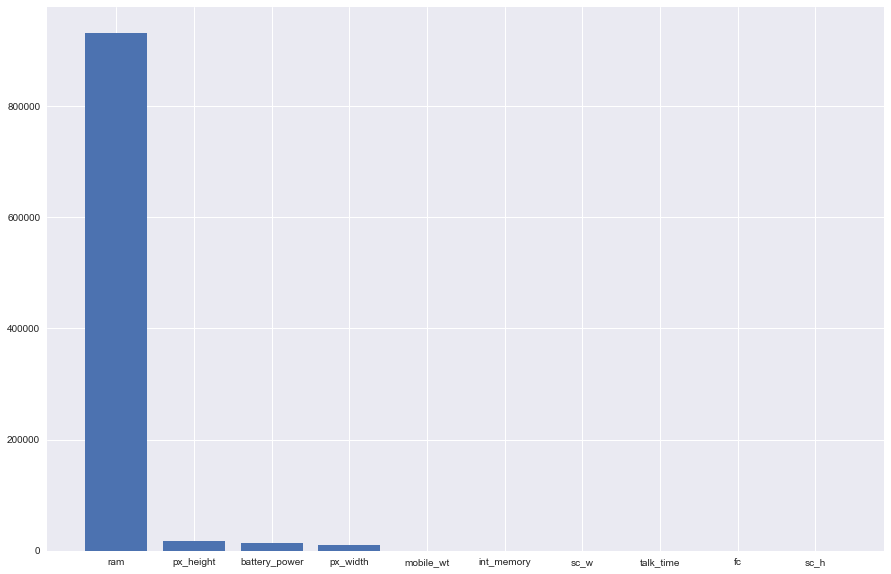

In [43]:
plt.figure(figsize=(15,10))
plt.style.use("seaborn")
plt.bar(feature_scores["features"][:10],feature_scores["score"][:10])

 TREE BASED METHOD

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model=RandomForestClassifier()

In [46]:
model.fit(X,y)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
print(model.feature_importances_)

[0.07574468 0.00482709 0.02436795 0.00638726 0.02500872 0.00617076
 0.0335572  0.02886511 0.0416303  0.02438042 0.03602901 0.05902615
 0.06087586 0.46338392 0.02888235 0.03105694 0.03044914 0.00504855
 0.00738212 0.00692647]


In [50]:
feature_importance=pd.DataFrame(model.feature_importances_,index=X.columns,columns=["Importance"])

In [51]:
print(feature_importance)

               Importance
battery_power    0.075745
blue             0.004827
clock_speed      0.024368
dual_sim         0.006387
fc               0.025009
four_g           0.006171
int_memory       0.033557
m_dep            0.028865
mobile_wt        0.041630
n_cores          0.024380
pc               0.036029
px_height        0.059026
px_width         0.060876
ram              0.463384
sc_h             0.028882
sc_w             0.031057
talk_time        0.030449
three_g          0.005049
touch_screen     0.007382
wifi             0.006926


In [52]:
feature_importance.sort_values(by="Importance",ascending=False)

,Importance
ram,0.463384
battery_power,0.075745
px_width,0.060876
px_height,0.059026
mobile_wt,0.041630
pc,0.036029
int_memory,0.033557
sc_w,0.031057
talk_time,0.030449
sc_h,0.028882


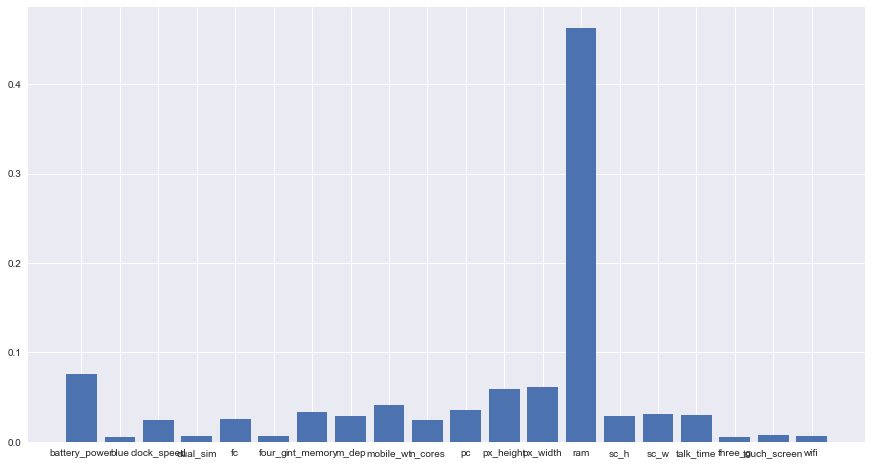

In [55]:
plt.figure(figsize=(15,8))
plt.bar(feature_importance.index,feature_importance["Importance"])
plt.show()

CORRELATION MATRIX BASED METHOD

In [56]:
data_corr=data.corr()

In [57]:
print(data_corr)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

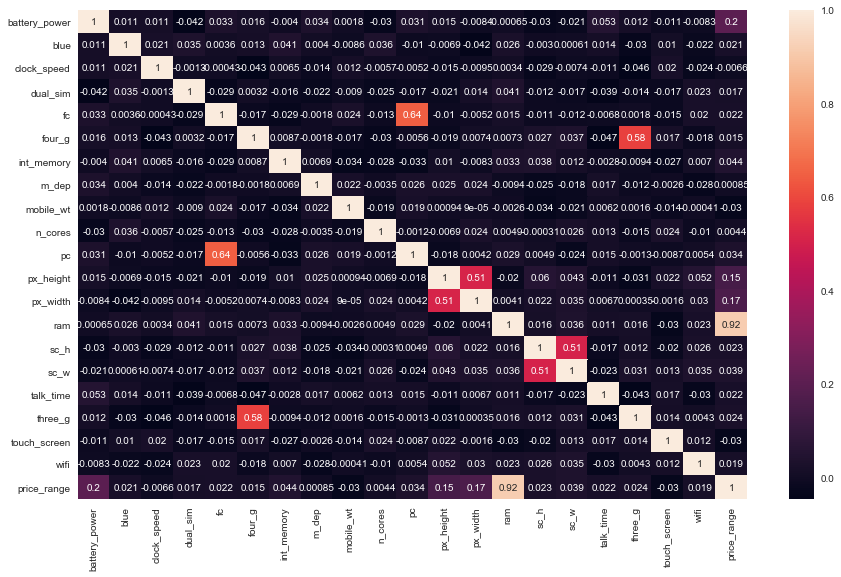

In [63]:
plt.figure(figsize=(15,9))
sns.heatmap(data_corr,annot=True)
plt.show()

In [64]:
# Ram has a high correlation with ram
#a combination of all the three methods can be used